### 1.2 CUSTOMER CHURN PREDICTION 

Problem Statement : Build a Predictive model to estimate the likelihood of customer churn for a telecommunication company
                    The model should consider factors such as customer demographics, Usage patterns, Billing history, and Customer 
                    service Interactions

Business Objective: Minimize the Customer churn rates,
Businesss Objective challenging factors  : By identifying some external factors like Customer behaviour, Service usage,
                                           and customer demographs, Improving Customer Retention, and optimize marketing strategies

Business Constraints : Maximize the Data Privacy and Compliance, Customer Satisfaction 

### Data Description

This datset contains 21 records in that 20 columns are dependent variables and one independent variable

### Project Management for CRISP-ML(Q) 

1.Business and Data Understanding
2. Data preparation or Data Pre-processing
3. Model Building
4. Model Evaluation
5. Model Deployment
6. Monitoring and maintainence

### Data Understanding

In [1]:
## Import the required packagess

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import io

In [2]:
%cd "C:\Users\hp\Downloads\archive (7)"

C:\Users\hp\Downloads\archive (7)


In [3]:
df_churn = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
df_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df_churn.info()    ### Info will give the complete details of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df_churn.shape

(7043, 21)

In [7]:
df_churn.head()   # It will give us the first five records 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
## Use the describe function  to give me the statistical summary of dataframe
df_churn.TotalCharges.describe

<bound method NDFrame.describe of 0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object>

In [10]:
## Similarly check the desc function of statistical summary for tenure column
df_churn.tenure.describe

<bound method NDFrame.describe of 0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64>

In [11]:
## Similarly check the desc function of statistical summary for tenure column
df_churn.MonthlyCharges.describe

<bound method NDFrame.describe of 0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7043, dtype: float64>

In [12]:
## Change the Total charges data type to float
df_churn.TotalCharges = pd.to_numeric(df_churn.TotalCharges, errors="coerce")

In [13]:
## Drop the null values
df_churn = df_churn.dropna()

In [14]:
### Check the info for datafrmae whether nulls has removed or not
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

### EXPLORATORY DATA ANALYSIS (EDA)

C:\Users\hp\ana3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\ana3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 3000x1500 with 0 Axes>

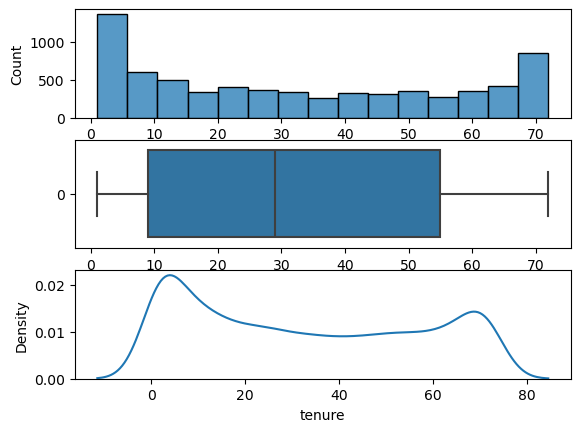

In [15]:
plt.figure(figsize=(30,15))
fog, ax = plt.subplots(3,1)
sns.histplot(df_churn.tenure, ax=ax[0])                         ## histogram for tenure plot to check the graph is evenly balanced or not
sns.boxplot(df_churn.tenure, orient="h", ax=ax[1])              ## Boxplot is usewd for verfiying the extreme values(outliers) from datset
sns.kdeplot(df_churn.tenure,ax=ax[2])                           ## kde plot find the distribution of the curve whethe it is symmetrical or not
plt.show()

From this data 

<Axes: ylabel='Frequency'>

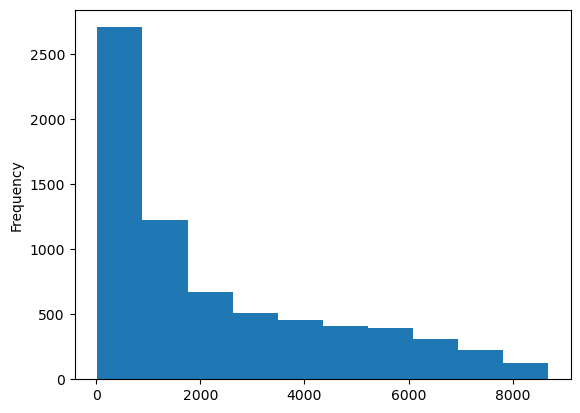

In [16]:
df_churn.TotalCharges.plot(kind = "hist")

<Axes: ylabel='count'>

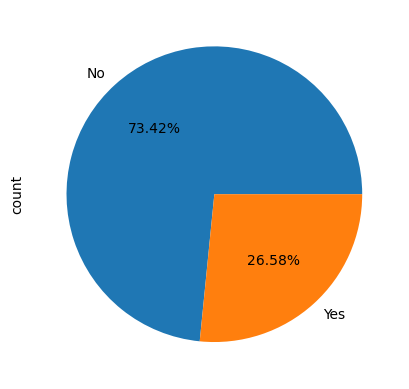

In [17]:
df_churn.Churn.value_counts().plot(kind = "pie", autopct = "%.2f%%")

From this pie-chart we can observe that the percentage of the churn is approximately 27% so that i will compare this with all other independent columns

In [18]:
df_churn.Churn.isnull().sum()   ## No missing values

0

<Axes: ylabel='count'>

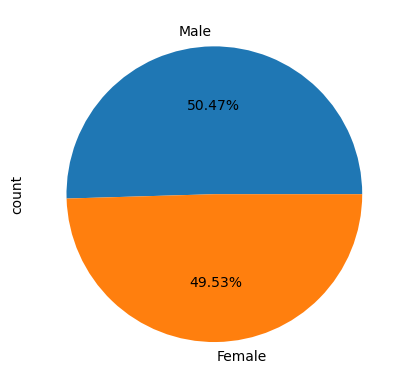

In [19]:
df_churn.gender.value_counts().plot(kind = "pie", autopct = "%.2f%%")

From this chart we can anlyse the Male and Female are approximately same 

<Axes: ylabel='count'>

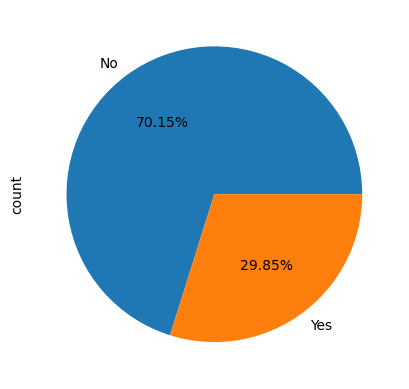

In [20]:
df_churn.Dependents.value_counts().plot(kind = "pie", autopct = "%.2f%%")

Here the marginal rate of dependents column has approximately 30% of doing churn rate

<Axes: xlabel='Churn'>

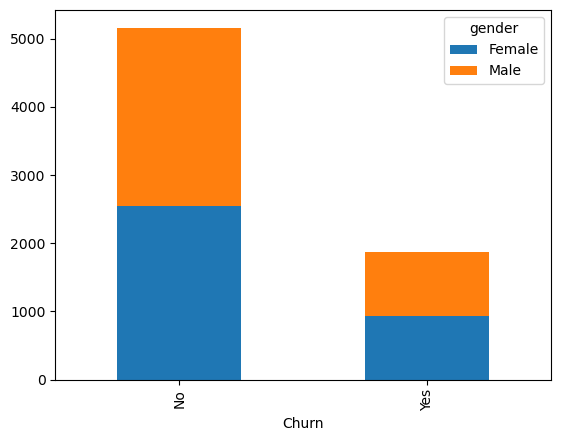

In [21]:
## Cross Tabulation & stacked bar chart -- Churn & gender , churn & contract
pd.crosstab(df_churn.Churn, df_churn.gender).plot(kind = "bar", stacked = True)

By using crosstab we are comparing the charts w.r.t Churn i.e dependent variable with gneder for getting the ratio of how many male and female customers

<Axes: xlabel='Churn'>

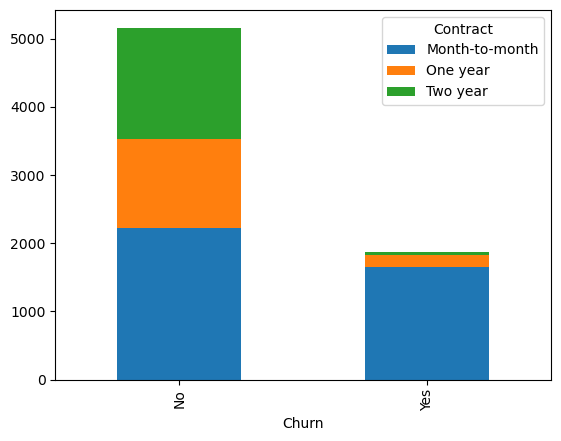

In [22]:
## Cross Tabulation for churn and contract
pd.crosstab(df_churn.Churn, df_churn.Contract).plot(kind = "bar", stacked = True)

In [ ]:
### do the Groupby() -- mean of following -- 
## Tenure & Gender
##Tenure & Contract
## Total charges & Internet Service
## Total Charges & Payment method

In [23]:
df_churn.tenure.groupby(df_churn.gender).mean()

gender
Female    32.290841
Male      32.550296
Name: tenure, dtype: float64

Here Mean s equal dor male and female so that there will be correlation factors w.r.t to churn rate

In [24]:
df_churn.tenure.groupby(df_churn.Contract).mean()

Contract
Month-to-month    18.036645
One year          42.073370
Two year          57.071810
Name: tenure, dtype: float64

In [25]:
df_churn.TotalCharges.groupby(df_churn.InternetService).mean()

InternetService
DSL            2119.789259
Fiber optic    3205.304570
No              665.220329
Name: TotalCharges, dtype: float64

In [26]:
df_churn.TotalCharges.groupby(df_churn.PaymentMethod).mean()

PaymentMethod
Bank transfer (automatic)    3079.299546
Credit card (automatic)      3071.396022
Electronic check             2090.868182
Mailed check                 1054.483915
Name: TotalCharges, dtype: float64

### HYPOTHESIS TESTING

### Test Null Average tenure of Churn Yes/No Equal

In [27]:
np.round(df_churn.tenure.groupby(df_churn.Churn).mean(), 2)

Churn
No     37.65
Yes    17.98
Name: tenure, dtype: float64

In [28]:
np.round(df_churn.tenure.groupby(df_churn.Churn).var(), 2)

Churn
No     579.70
Yes    381.46
Name: tenure, dtype: float64

In [29]:
no = df_churn[df_churn.Churn == "No"]
yes = df_churn[df_churn.Churn == "Yes"]

In [30]:
from scipy.stats import ttest_ind

In [31]:
ttest_ind(no.tenure, yes.tenure, equal_var=False) #since pvalue=2.3470747188949523e-234 is less than 0.05, Hence Reject NUll

TtestResult(statistic=34.97187009750348, pvalue=2.3470747188949523e-234, df=4045.509715421308)

In [32]:
## Test Null Average Total Charges of Churn Yes/No Equal
np.round(df_churn.TotalCharges.groupby(df_churn.Churn).mean(),2)

Churn
No     2555.34
Yes    1531.80
Name: TotalCharges, dtype: float64

In [33]:
np.round(df_churn.TotalCharges.groupby(df_churn.Churn).var(),2)

Churn
No     5426369.84
Yes    3575211.60
Name: TotalCharges, dtype: float64

In [34]:
ttest_ind(no.TotalCharges, yes.TotalCharges, equal_var=False) #Since pvalue=1.1524944112838114e-75 is less than 0.05, Reject NUll

TtestResult(statistic=18.80076821738761, pvalue=1.1524944112838114e-75, df=4042.931054911744)

In [35]:
## Test Null Average Tenure of different payment method equal
np.round(df_churn.tenure.groupby(df_churn.PaymentMethod).mean(),2)

PaymentMethod
Bank transfer (automatic)    43.71
Credit card (automatic)      43.30
Electronic check             25.17
Mailed check                 21.94
Name: tenure, dtype: float64

In [36]:
np.round(df_churn.tenure.groupby(df_churn.PaymentMethod).var(),2)

PaymentMethod
Bank transfer (automatic)    536.36
Credit card (automatic)      543.86
Electronic check             500.97
Mailed check                 450.08
Name: tenure, dtype: float64

In [37]:
banktransfer = df_churn[df_churn.PaymentMethod == "Bank transfer (automatic)"]
creditcard = df_churn[df_churn.PaymentMethod == "Credit card (automatic)"]
electroniccheck = df_churn[df_churn.PaymentMethod == "Electronic check"]
mailedcheck = df_churn[df_churn.PaymentMethod == "Mailed check"]

In [38]:
from scipy.stats import f_oneway

In [39]:
f_oneway(banktransfer.tenure, creditcard.tenure, electroniccheck.tenure, mailedcheck.tenure)
#Since pvalue=4.666987312809702e-265 is less than 0.05 then Reject Null

F_onewayResult(statistic=445.6300438001573, pvalue=4.666987312809702e-265)

### Test Null average Total charges of different Payment method is equal

In [40]:
df_churn.TotalCharges.groupby(df_churn.PaymentMethod).mean()

PaymentMethod
Bank transfer (automatic)    3079.299546
Credit card (automatic)      3071.396022
Electronic check             2090.868182
Mailed check                 1054.483915
Name: TotalCharges, dtype: float64

In [41]:
f_oneway(banktransfer.TotalCharges, creditcard.TotalCharges, creditcard.TotalCharges, mailedcheck.TotalCharges)

F_onewayResult(statistic=338.3944981925856, pvalue=1.8118924997726824e-203)

#### Test Null NO Association b/w Churn and Contract

In [42]:
### Both are Categorical so we do Chi_square test
from scipy.stats import chi2_contingency

In [43]:
chi2_contingency(pd.crosstab(df_churn.Churn, df_churn.Contract))
## Since pvalue = 7.326182186264635e-257 is less than 0.05 then Reject Null
## Alternate Hypothesis is true, that there is relation b/w churn and contract

Chi2ContingencyResult(statistic=1179.5458287339447, pvalue=7.326182186264635e-257, dof=2, expected_freq=array([[2845.08319113, 1080.76450512, 1237.15230375],
       [1029.91680887,  391.23549488,  447.84769625]]))

#### Test Null No Association b/w Churn & Payment method

In [44]:
chi2_contingency(pd.crosstab(df_churn.Churn, df_churn.PaymentMethod))
## since pvalue=1.4263098511062525e-139 is less than 0.05, then Reject Null
## Alternate Hypothesis is true that there is relation b/w churn & payment method

Chi2ContingencyResult(statistic=645.4299001234639, pvalue=1.4263098511062525e-139, dof=3, expected_freq=array([[1132.15955631, 1116.74104096, 1736.41851536, 1177.68088737],
       [ 409.84044369,  404.25895904,  628.58148464,  426.31911263]]))

 #### Test Null No Association b/w Churn & TechSupport 

In [45]:
chi2_contingency(pd.crosstab(df_churn.Churn, df_churn.TechSupport))
## Since pvalue=7.407807748843288e-180 is less than 0.05 then Reject NUll
## Alternate Hypothesis is true that there is relation b/w churn & Techsuppport

Chi2ContingencyResult(statistic=824.9255643875022, pvalue=7.407807748843288e-180, dof=2, expected_freq=array([[2549.19453925, 1116.00682594, 1497.79863481],
       [ 922.80546075,  403.99317406,  542.20136519]]))

In [46]:
df_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [47]:
### seperating the numeric columns and obj cols
num_cols = df_churn[['tenure', 'MonthlyCharges', 'TotalCharges']]
obj_cols = df_churn[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                     'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]

In [48]:
num_cols

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [49]:
### Check the correlation fr num cols
num_cols.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.246862,0.825880
MonthlyCharges,0.246862,1.000000,0.651065
TotalCharges,0.825880,0.651065,1.000000


In [50]:
obj_cols.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [51]:
obj_cols_dummy = pd.get_dummies(obj_cols, columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'])

In [52]:
df_churn_final = pd.concat([num_cols, obj_cols_dummy], axis=1)

In [53]:
df_churn_final

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,No,True,False,True,False,False,True,...,False,True,False,False,False,True,False,False,True,False
1,34,56.95,1889.50,No,False,True,True,False,True,False,...,False,False,True,False,True,False,False,False,False,True
2,2,53.85,108.15,Yes,False,True,True,False,True,False,...,False,True,False,False,False,True,False,False,False,True
3,45,42.30,1840.75,No,False,True,True,False,True,False,...,False,False,True,False,True,False,True,False,False,False
4,2,70.70,151.65,Yes,True,False,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,No,False,True,True,False,False,True,...,True,False,True,False,False,True,False,False,False,True
7039,72,103.20,7362.90,No,True,False,True,False,False,True,...,True,False,True,False,False,True,False,True,False,False
7040,11,29.60,346.45,No,True,False,True,False,False,True,...,False,True,False,False,False,True,False,False,True,False
7041,4,74.40,306.60,Yes,False,True,False,True,False,True,...,False,True,False,False,False,True,False,False,False,True


### Data Sepertaion 

In [54]:
X = df_churn_final.drop('Churn', axis=1)
X

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,True,False,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,34,56.95,1889.50,False,True,True,False,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,2,53.85,108.15,False,True,True,False,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,45,42.30,1840.75,False,True,True,False,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,2,70.70,151.65,True,False,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,False,True,True,False,False,True,False,...,True,False,True,False,False,True,False,False,False,True
7039,72,103.20,7362.90,True,False,True,False,False,True,False,...,True,False,True,False,False,True,False,True,False,False
7040,11,29.60,346.45,True,False,True,False,False,True,False,...,False,True,False,False,False,True,False,False,True,False
7041,4,74.40,306.60,False,True,False,True,False,True,True,...,False,True,False,False,False,True,False,False,False,True


In [55]:
y = df_churn_final.Churn
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object

### Encoding

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
y = LabelEncoder().fit_transform(y)

In [58]:
y

array([0, 0, 1, ..., 0, 1, 0])

#### Check the Imbalanceness

<Axes: xlabel='Churn'>

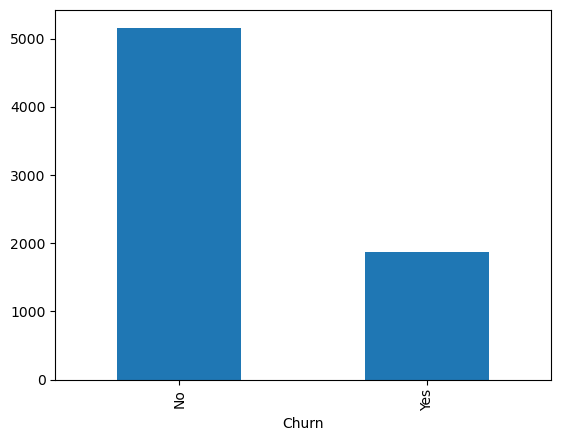

In [59]:
df_churn.Churn.value_counts().plot(kind = "bar")

### Model Buidling

####  Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
logreg = LogisticRegression(max_iter=1000)

In [62]:
logreg

LogisticRegression(max_iter=1000)

In [63]:
logreg_model = logreg.fit(X,y)
## Convergence warning means -- All coeffiecients (Beta's) are not calculated

In [64]:
logreg_model.score(X,y)

0.8063139931740614

In [65]:
log_pred = logreg_model.predict(X)

In [66]:
log_pred

array([1, 0, 0, ..., 0, 1, 0])

In [67]:
pd.crosstab(y, log_pred)  ## Confusion Matrix

col_0,0,1
row_0,,
0,4624,539
1,823,1046


In [69]:
(4624+1046)/(4624+539+823+1046) ## Verifying form the crosstabulation to check the classes imbalanecd or not

0.8063139931740614

In [70]:
from sklearn.metrics import classification_report, RocCurveDisplay

In [72]:
## Confusion matrix
print(classification_report(y,log_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      5163
           1       0.66      0.56      0.61      1869

    accuracy                           0.81      7032
   macro avg       0.75      0.73      0.74      7032
weighted avg       0.80      0.81      0.80      7032



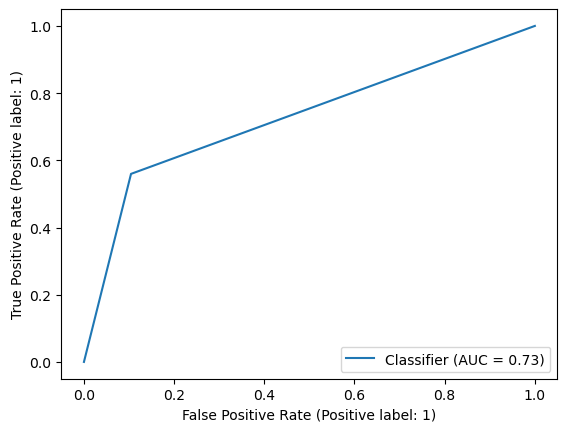

In [73]:
RocCurveDisplay.from_predictions(y,log_pred)

In [74]:
df_churn.to_excel("churn.xlsx")

In [75]:
num_cols.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [76]:
X2 = num_cols
X2

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [77]:
logit = LogisticRegression()
logit

LogisticRegression()

In [78]:
logreg1 = logit.fit(X2,y)
logreg1

LogisticRegression()

In [79]:
logreg1.score(X2,y)

0.7849829351535836

In [80]:
logreg1.intercept_

array([-1.59884834])

In [81]:
logreg1.coef_

array([[-0.06711264,  0.03019993,  0.00014507]])

In [82]:
logreg.intercept_

array([-0.11677285])

### Decision Tree Classifier

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
dtc = DecisionTreeClassifier(max_depth=8)
dtc

DecisionTreeClassifier(max_depth=8)

In [85]:
dtm_model = dtc.fit(X,y)
dtm_model

DecisionTreeClassifier(max_depth=8)

In [86]:
dtm_model.score(X,y)

0.834613196814562

In [87]:
from sklearn.model_selection import cross_val_score

In [88]:
cross_val_score(dtc, X, y)

array([0.77967306, 0.7782516 , 0.76315789, 0.76529161, 0.78378378])

In [89]:
np.mean([0.7803838 , 0.78109453, 0.76173542, 0.76600284, 0.78520626])

0.77488457

In [90]:
dtm_pred = dtm_model.predict(X)
dtm_pred

array([1, 0, 0, ..., 0, 1, 0])

In [91]:
pd.crosstab(y, dtm_pred)  ## confusion matrix

col_0,0,1
row_0,,
0,4692,471
1,692,1177


In [92]:
(4689+1178)/(4689+474+691+1178)

0.8343287827076223

In [93]:
print(classification_report(y,dtm_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      5163
           1       0.71      0.63      0.67      1869

    accuracy                           0.83      7032
   macro avg       0.79      0.77      0.78      7032
weighted avg       0.83      0.83      0.83      7032



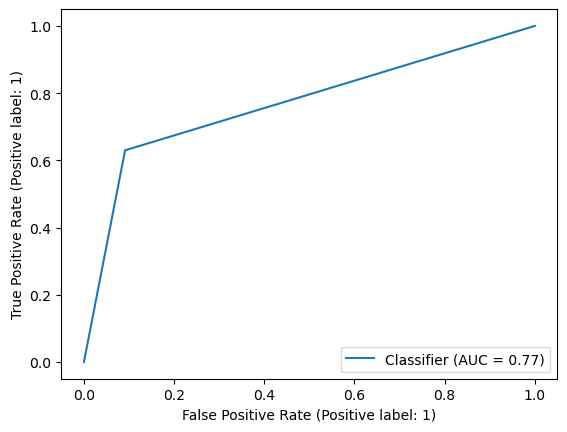

In [94]:
RocCurveDisplay.from_predictions(y,dtm_pred)  ## AUC -- 0.77

In [95]:
from sklearn.tree import plot_tree, export_text

In [96]:
print(export_text(dtm_model, feature_names=list(X.columns)))

|--- Contract_Month-to-month <= 0.50
|   |--- MonthlyCharges <= 93.67
|   |   |--- Contract_One year <= 0.50
|   |   |   |--- PaymentMethod_Electronic check <= 0.50
|   |   |   |   |--- SeniorCitizen_0 <= 0.50
|   |   |   |   |   |--- Dependents_No <= 0.50
|   |   |   |   |   |   |--- PaperlessBilling_Yes <= 0.50
|   |   |   |   |   |   |   |--- OnlineBackup_No internet service <= 0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- OnlineBackup_No internet service >  0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- PaperlessBilling_Yes >  0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Dependents_No >  0.50
|   |   |   |   |   |   |--- tenure <= 66.50
|   |   |   |   |   |   |   |--- tenure <= 65.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- tenure >  65.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- tenure >  66.50
|   |   |   |   | 

###  Decision Tree Regressor

In [97]:
from sklearn.tree import DecisionTreeRegressor

In [98]:
dtr = DecisionTreeClassifier(max_depth=8)
dtr

DecisionTreeClassifier(max_depth=8)

In [101]:
dtr_model = dtr.fit(X,y)
dtr_model

DecisionTreeClassifier(max_depth=8)

In [102]:
dtr_model.score(X,y)

0.8343287827076223

In [103]:
from sklearn.model_selection import cross_val_score

In [104]:
cross_val_score(dtc, X, y)

array([0.78180526, 0.77896233, 0.76173542, 0.76458037, 0.78093883])

In [105]:
np.mean([0.7803838 , 0.78109453, 0.76173542, 0.76600284, 0.78520626])

0.77488457

In [106]:
dtr_pred = dtr_model.predict(X)
dtr_pred

array([1, 0, 0, ..., 0, 1, 0])

In [108]:
from sklearn.tree import plot_tree, export_text

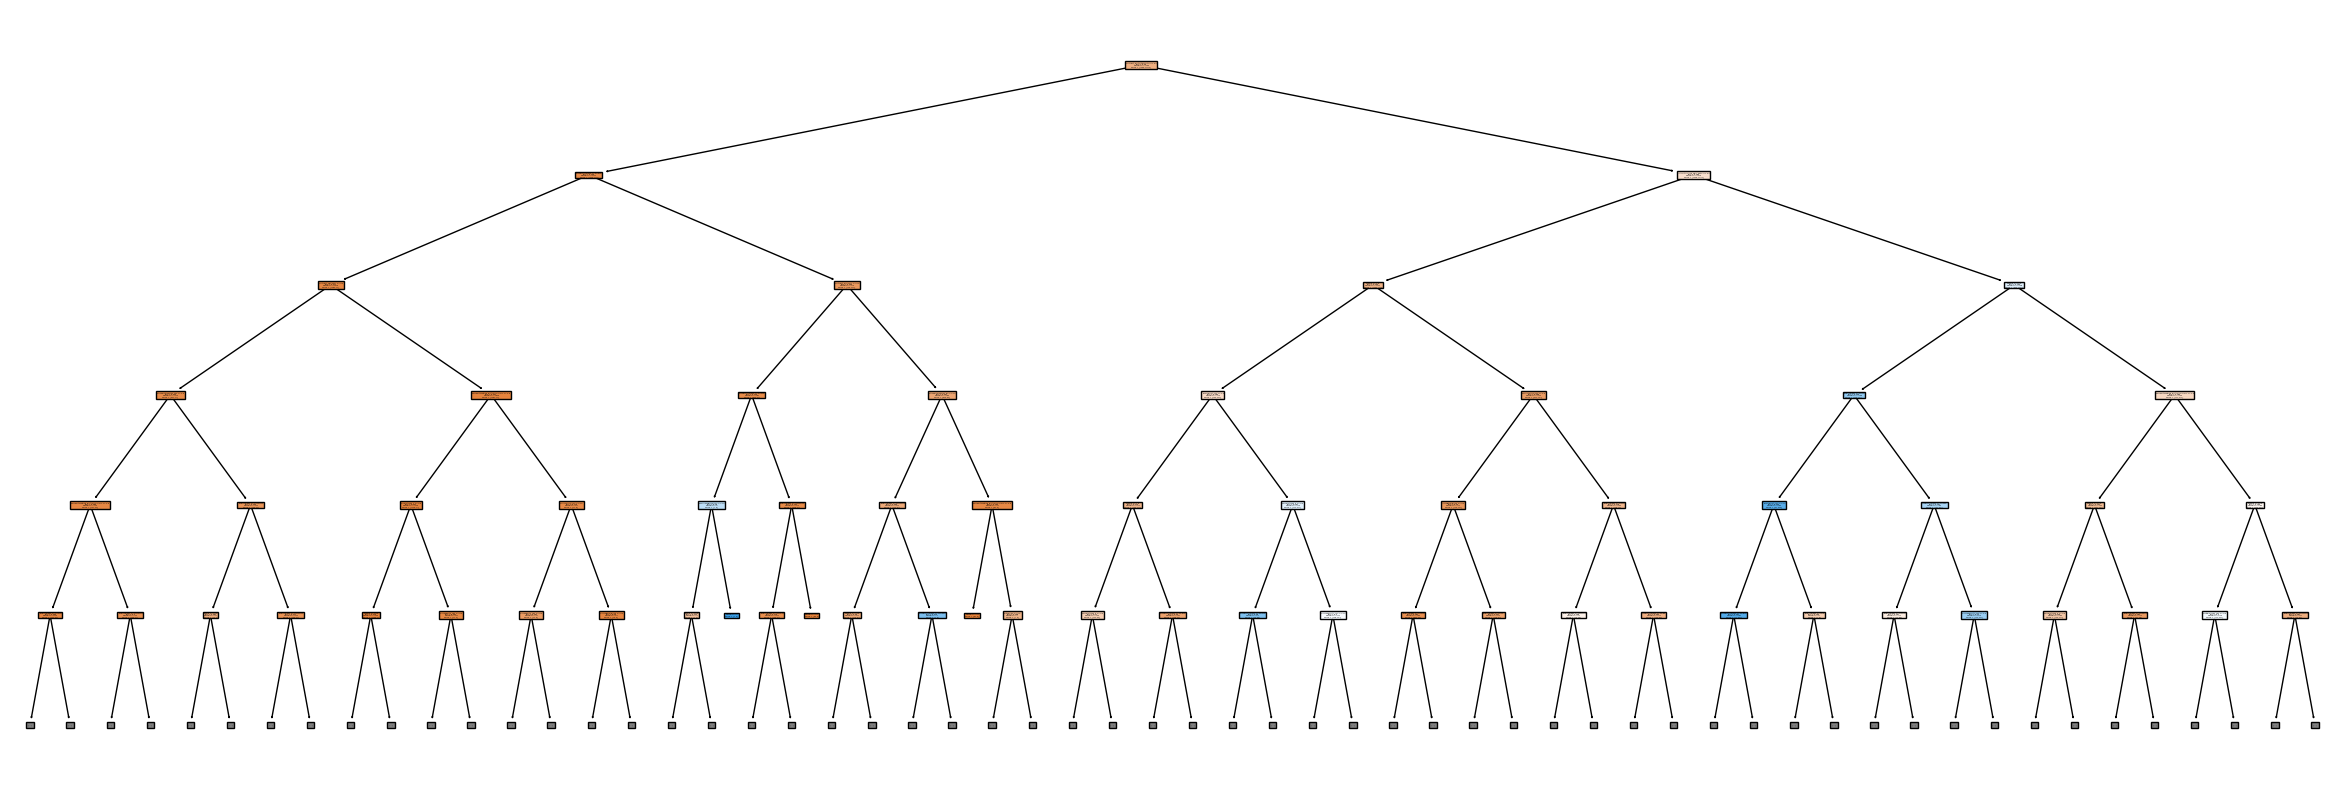

In [109]:
plt.figure(figsize=(30,10))
plot_tree(dtr_model, feature_names=X.columns.tolist(), class_names=None, filled=True, max_depth=5)
plt.show()

### Random Forest Classifier

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
rtc = RandomForestClassifier(max_depth=8)
rtc

RandomForestClassifier(max_depth=8)

In [112]:
rtm_model = rtc.fit(X,y)
rtm_model

RandomForestClassifier(max_depth=8)

In [113]:
rtm_model.score(X,y)

0.8270762229806599

In [114]:
from sklearn.model_selection import cross_val_score

In [115]:
cross_val_score(rtc, X, y)

array([0.80952381, 0.80810235, 0.78165007, 0.81081081, 0.80583215])

In [116]:
np.mean([0.7803838 , 0.78109453, 0.76173542, 0.76600284, 0.78520626])

0.77488457

In [117]:
rtm_pred = rtm_model.predict(X)
rtm_pred

array([1, 0, 0, ..., 0, 1, 0])

In [118]:
pd.crosstab(y, dtm_pred)  ## confusion matrix

col_0,0,1
row_0,,
0,4692,471
1,692,1177


In [119]:
(4692+1177)/(4692+471+692+1177)

0.834613196814562

In [120]:
print(classification_report(y,rtm_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89      5163
           1       0.73      0.56      0.63      1869

    accuracy                           0.83      7032
   macro avg       0.79      0.74      0.76      7032
weighted avg       0.82      0.83      0.82      7032



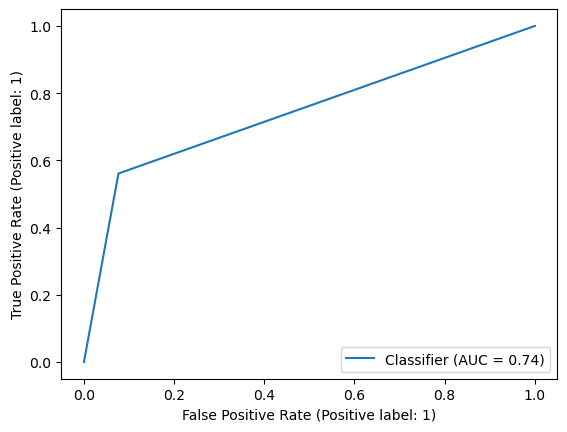

In [122]:
RocCurveDisplay.from_predictions(y,rtm_pred)  ## AUC -- 0.77

In [126]:
#Multiple Linear Regression explains linear relationship between dependent variable(y) and
# multiple independent variables(X's). Multiple Linear Regression is an equation

# y = B0+B1X1+B2X2+B3X3+B4X4 + ........... +BnXn+Et
# y - Dependent Variable or Predicted Variable
# Bo - Intercept or Constant (point at which straight line touched y axis)
# B1,B2,B3,B4,..Bn - Coefficients
# X1,X2,X3,X4,,,,Xn - Independent Variables or Predictors
# Et - Error term or Residual=ActualValue - PredictedValue

# Assumptions - MLR is parametric Algorithm(many assumptions) - Pre Model
# 1) Dependent Variable y must be numerical,continuous, closer to normal distribution with
# minimum outliers and no missing values
# 2) Independent Variabels(X's) can be both numerical and nonnumeric categorical
# 3) No Multicollinearity - Multicollinearity is very strong correlation(>0.90) among
# variables. If multicollinearity is found do not include both variables choose .

# Post Model Assumptions
# 7) Residuals must be normally distributed. Check using Q-Q plot
# 8) Residuals must be homosceadstic in nature


# Interpretation of Output (Python Only)
# R Square must be between 0.60 - 0.95. R SQuare explains amount of variance occuring in
# dependent variable caused by independent variables or model.
# less than 0.60 - Underfitting
# greater than 0.95 - Overfitting

# Intercept + Coefficients for creating predictive equation

# Statistical Interpretation of Output
# 1) Adjusted R Square must be between 0.60 - 0.95. Adj R Square is sensitive to independent
# variable significance, if independent variable is significant it will increase and if
# variable is insignificant it will decrease.

# 2) model p-value(lies below Adjusted R SQuare) or Significance F in MS Excel must be
# less than 0.05. Reject Null
# Null - Coefficients(B's) are equal to Zero
# Alt - Coefficients(B's) are not equal to Zero

# 3) Independent Variables(X's) p-value must be less than 0.05. Reject Null
# Null - Independent Variable is Insignificant
# Alt - Independent Variable is Significant

In [127]:
from sklearn.linear_model import LinearRegression

In [128]:
reg_mod = LinearRegression().fit(X,y)

In [129]:
reg_mod.score(X,y)

0.2840573969042246

In [130]:
### for deployment the model needsto be converted into pickle (.pkl)  or joblib (.sav) file
import joblib

In [131]:
joblib.dump(rtm_model, "reg_model.sav")

['reg_model.sav']

In [132]:
### for deployment the model needsto be converted into pickle (.pkl)  or joblib (.sav) file
import joblib